Ceci est la correction du traitement de donnée sur le dataset du titanic.

Accuracy: 0.7607655502392344
Impurity (Gini) at root node: 0.48339170390306463
Profondeur de l'arbre de décision: 20


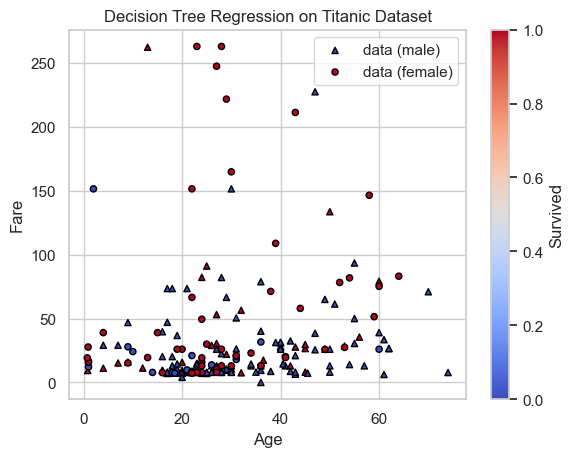

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Charger le dataset Titanic
file_path = 'datasets/titanic.csv'
df = pd.read_csv(file_path)

# Sélection des colonnes pertinentes
selected_columns = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "survived"]
df = df[selected_columns]

# Suppression des lignes avec des valeurs manquantes
df = df.dropna()

# Séparation des features et de la variable cible
X = df.drop("survived", axis=1)
y = df["survived"]

# Définition des colonnes catégoriques et numériques
categorical_cols = ["sex", "embarked"]
numeric_cols = ["pclass", "age", "sibsp", "parch", "fare"]

# Création du preprocessor pour transformer les données
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ])

# Création du pipeline avec le preprocessor et le modèle d'arbre de décision
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustement du modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)


# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Accéder à l'impureté de Gini au nœud racine
root_gini = pipeline.named_steps['model'].tree_.impurity[0]
print("Impurity (Gini) at root node:", root_gini)

# Accéder à la profondeur de l'arbre de décision
tree_depth = pipeline.named_steps['model'].tree_.max_depth
print("Profondeur de l'arbre de décision:", tree_depth)

# Tracé des résultats
plt.figure()

# Utiliser des triangles pour les individus de sexe masculin ('male') et des cercles pour les individus de sexe féminin ('female')
for sex, marker in [('male', '^'), ('female', 'o')]:
    subset = X_test[X_test["sex"] == sex]
    plt.scatter(subset["age"], subset["fare"], s=20, edgecolor="black", c=y_test[X_test["sex"] == sex], cmap="coolwarm", label=f"data ({sex})", marker=marker)

plt.colorbar(label="Survived")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Decision Tree Regression on Titanic Dataset")
plt.legend()
plt.show()


Pour continuer avec le dataset du titanic, voici le code pour créer un randomforest:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = 'datasets/titanic.csv'

df = pd.read_csv(file_path)

# Sélection des colonnes pertinentes
selected_columns = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "survived"]
df = df[selected_columns]

# Suppression des lignes avec des valeurs manquantes
df = df.dropna()

# Séparation des features et de la variable cible
X = df.drop("survived", axis=1)
y = df["survived"]

# Définition des colonnes catégoriques et numériques
categorical_cols = ["sex", "embarked"]
numeric_cols = ["pclass", "age", "sibsp", "parch", "fare"]

# Création du preprocessor pour transformer les données
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ])

# Création du pipeline avec le preprocessor et le modèle RandomForestClassifier
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustement du modèle sur les données d'entraînement
pipeline_rf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = pipeline_rf.predict(X_test)

# Calcul de l'accuracy pour le modèle RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (RandomForest):", accuracy_rf)

# Accéder à l'impureté de Gini au nœud racine
root_gini = pipeline.named_steps['model'].tree_.impurity[0]
print("Impurity (Gini) at root node:", root_gini)

# Accéder à la profondeur de l'arbre de décision
tree_depth = pipeline.named_steps['model'].tree_.max_depth
print("Profondeur de l'arbre de décision:", tree_depth)

Accuracy (RandomForest): 0.7703349282296651


NameError: name 'pipeline' is not defined